In [99]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# Load the dataset
df = pd.read_csv('loan_approval.csv')
print(df)

    Income  CreditScore Approved
0    25000          600       No
1    30000          650       No
2    40000          700      Yes
3    50000          750      Yes
4    60000          800      Yes
5    35000          680       No
6    45000          720      Yes
7    55000          770      Yes
8    20000          590       No
9    32000          660       No
10   48000          740      Yes
11   52000          760      Yes
12   28000          640       No
13   42000          710      Yes
14   58000          780      Yes


In [103]:
# Convert target to binary
df['Approved'] = df['Approved'].map({'No': 0, 'Yes': 1})

In [105]:
# Features and target
X = df[['Income', 'CreditScore']]
y = df['Approved']

In [107]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
#  Create & train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Make predictions
y_pred = model.predict(X_test)

In [113]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [115]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2 0]
 [0 1]]


In [117]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [131]:
# Pick the first tree in the forest
estimator = model.estimators_[0]

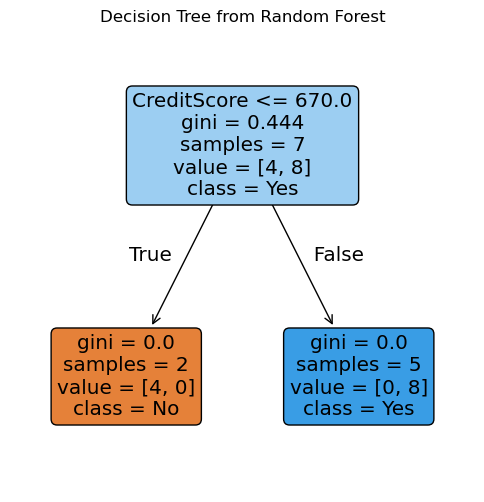

In [133]:
# Plot the tree
plt.figure(figsize=(6, 6))
plot_tree(estimator, 
          feature_names=['Income', 'CreditScore'], 
          class_names=['No', 'Yes'], 
          filled=True,
          rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()

In [123]:
#  Feature importance
importances = model.feature_importances_
print(f"Feature Importance:\nIncome: {importances[0]:.2f}, CreditScore: {importances[1]:.2f}")

Feature Importance:
Income: 0.49, CreditScore: 0.51


In [125]:
# Predict for new input
new_applicant = [[45000, 730]]
prediction = model.predict(new_applicant)
print(f"\nWill an applicant with ₹45,000 income & 730 credit score get approved? {'Yes' if prediction[0]==1 else 'No'}")


Will an applicant with ₹45,000 income & 730 credit score get approved? Yes


C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
